In [1]:
from scikeras.wrappers import KerasClassifier 
from sklearn.model_selection import GridSearchCV
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, SimpleRNN, Reshape, GRU, Dropout, BatchNormalization, Attention, Dot
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, mean_squared_error
from imblearn.over_sampling import SMOTE

In [2]:
folder_path = 'C:\\Users\\Administrator\\Documents\\TA\\dataset_feature_extracted\\'

Delete NaN Row

Test Train Split

In [3]:
record_names = ['100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '111', '112', '113', '114', '115', '116', '117', '118', '119', '121', '122', '123', '124', '200', '201', '202', '203', '205', '207', '208', '209', '210', '212', '213', '214', '215', '217', '219', '220', '221', '222', '223', '228', '230', '231', '232', '233', '234']

dfs = []

for record_name in record_names:
    df = pd.read_csv(f'C:\\Users\\Administrator\\Documents\\TA\\dataset_feature_extracted\\{record_name}_new.csv')
    dfs.append(df)

    # unique_labels = df.iloc[:, -1].unique()
    # print(record_name, unique_labels)

# Gabungkan DataFrame menjadi satu DataFrame tunggal
combined_df = pd.concat(dfs, ignore_index=True)
combined_df = combined_df[~combined_df['Label'].str.contains('[\+Q!EJf\"~a]')]

# Cetak hasilnya
print(combined_df)

     Label  Min RR  Max RR      AVG RR  Median RR   Skew RR  Kurtosis RR  \
0        A     275     331  295.608696      295.0  1.053874     0.839279   
1        N     265     324  293.458333      294.5  0.045407     0.182541   
2        N     275     306  291.956522      290.0  0.091653    -0.940913   
3        N     278     309  291.583333      291.5  0.148143    -0.898717   
4        N     277     311  292.083333      289.5  0.444330    -0.777377   
...    ...     ...     ...         ...        ...       ...          ...   
4363     N     227     260  242.586207      243.0  0.204324    -0.258361   
4364     N     227     306  240.310345      238.0  3.623050    14.650541   
4365     N     229     251  242.586207      243.0 -0.817607     0.006916   
4366     N     235     291  246.000000      241.5  2.285232     5.352454   
4367     N     235     292  251.166667      244.0  1.506415     0.694636   

      Min PR  Max PR     AVG PR  ...     AVG QT  Median QT   Skew QT  \
0         37   

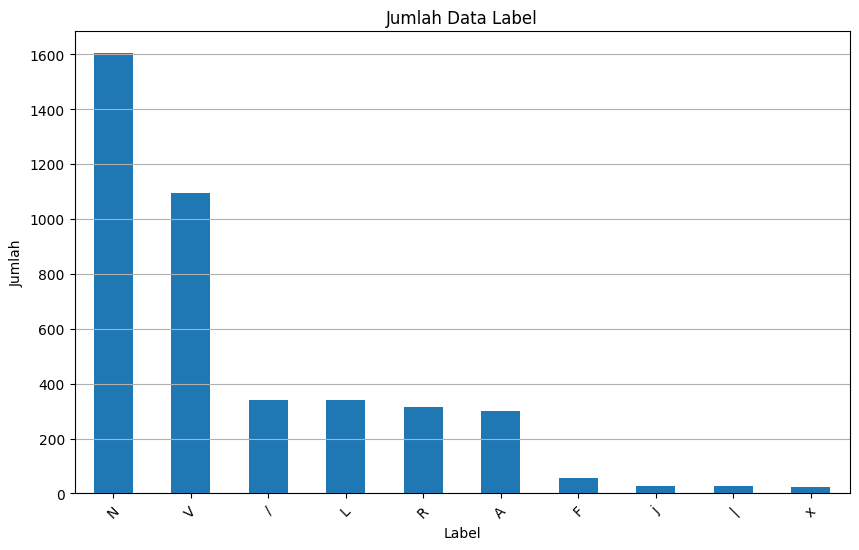

In [4]:
# Hitung jumlah kemunculan setiap nilai di kolom 'Label'
label_counts = combined_df['Label'].value_counts()

# Plot bar chart jumlah data label
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Jumlah Data Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [5]:
combined_df.isna().sum()

Label           0
Min RR          0
Max RR          0
AVG RR          0
Median RR       0
Skew RR         0
Kurtosis RR     0
Min PR          0
Max PR          0
AVG PR          0
Median PR       0
Skew PR         0
Kurtosis PR     0
Min QT          0
Max QT          0
AVG QT          0
Median QT       0
Skew QT         0
Kurtosis QT     0
Min QRS         0
Max QRS         0
AVG QRS         0
Median QRS      0
Skew QRS        0
Kurtosis QRS    0
dtype: int64

In [38]:
with open("C:\\Users\\Administrator\\Documents\\my TA model\\combined_df.pkl", "wb") as f:
    pickle.dump(combined_df, f)

Split Train and Test Phase

In [6]:
y = combined_df['Label']
X = combined_df.drop(columns=['Label'])

In [7]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 4, 4, ..., 4, 4, 4])

In [8]:
# Menghitung banyaknya masing-masing label
label_counts = np.bincount(y)

# Menampilkan hasil
for label, count in enumerate(label_counts):
    print(f'Label {label}: {count} occurrences')

Label 0: 342 occurrences
Label 1: 302 occurrences
Label 2: 58 occurrences
Label 3: 339 occurrences
Label 4: 1603 occurrences
Label 5: 315 occurrences
Label 6: 1094 occurrences
Label 7: 27 occurrences
Label 8: 22 occurrences
Label 9: 26 occurrences


In [9]:
for i in range(19):
    print(i, "=", le.inverse_transform([i]))

0 = ['/']
1 = ['A']
2 = ['F']
3 = ['L']
4 = ['N']
5 = ['R']
6 = ['V']
7 = ['j']
8 = ['x']
9 = ['|']


ValueError: y contains previously unseen labels: [10]

In [10]:
sm = SMOTE(random_state=42)
X_resampling, y_resampling = sm.fit_resample(X, y)

In [47]:
with open("C:\\Users\\Administrator\\Documents\\my TA model\\X_resampling.pkl", "wb") as f:
    pickle.dump(X_resampling, f)

In [48]:
with open("C:\\Users\\Administrator\\Documents\\my TA model\\y_resampling.pkl", "wb") as f:
    pickle.dump(y_resampling, f)

In [11]:
# Menghitung banyaknya masing-masing label
label_counts = np.bincount(y_resampling)

# Menampilkan hasil
for label, count in enumerate(label_counts):
    print(f'Label {label}: {count} occurrences')

Label 0: 1603 occurrences
Label 1: 1603 occurrences
Label 2: 1603 occurrences
Label 3: 1603 occurrences
Label 4: 1603 occurrences
Label 5: 1603 occurrences
Label 6: 1603 occurrences
Label 7: 1603 occurrences
Label 8: 1603 occurrences
Label 9: 1603 occurrences


In [12]:
X_resampling.head()

,Min RR,Max RR,AVG RR,Median RR,Skew RR,Kurtosis RR,Min PR,Max PR,AVG PR,Median PR,...,AVG QT,Median QT,Skew QT,Kurtosis QT,Min QRS,Max QRS,AVG QRS,Median QRS,Skew QRS,Kurtosis QRS
0,275,331,295.608696,295.0,1.053874,0.839279,37,66,57.416667,60.0,...,75.565217,76.0,-0.920519,1.915276,0.038889,0.172222,0.077778,0.044444,1.067616,-0.804765
1,265,324,293.458333,294.5,0.045407,0.182541,49,68,60.125000,61.0,...,77.333333,77.5,-0.735734,1.001693,0.063889,0.205556,0.166782,0.169444,-1.799679,3.875787
2,275,306,291.956522,290.0,0.091653,-0.940913,50,68,59.208333,60.0,...,80.695652,80.0,0.467175,-0.712123,0.166667,0.216667,0.183575,0.180556,0.704172,-0.613661
3,278,309,291.583333,291.5,0.148143,-0.898717,47,66,54.200000,52.0,...,80.791667,80.5,0.625572,0.783684,0.041667,0.061111,0.045139,0.044444,1.822580,3.497428
4,277,311,292.083333,289.5,0.444330,-0.777377,54,63,59.120000,60.0,...,79.333333,78.0,0.429184,-0.637050,0.163889,0.211111,0.179630,0.177778,0.763258,-0.382609


In [13]:
# min_max_scaler = MinMaxScaler()
# X_resampling = pd.DataFrame(min_max_scaler.fit_transform(X_resampling), columns=X_resampling.columns)

standard_scaler = StandardScaler()
fit_scaler = standard_scaler.fit_transform(X_resampling)
X_resampling = pd.DataFrame(fit_scaler, columns=X_resampling.columns)

In [45]:
with open("C:\\Users\\Administrator\\Documents\\my TA model\\standard_scaler.pkl", "wb") as f:
    pickle.dump(standard_scaler, f)

In [14]:
X_resampling.head()

,Min RR,Max RR,AVG RR,Median RR,Skew RR,Kurtosis RR,Min PR,Max PR,AVG PR,Median PR,...,AVG QT,Median QT,Skew QT,Kurtosis QT,Min QRS,Max QRS,AVG QRS,Median QRS,Skew QRS,Kurtosis QRS
0,1.440962,-0.428245,0.213358,0.252465,0.621199,-0.254825,-0.820873,-0.867825,-0.313446,0.064650,...,-0.673102,-0.510255,-1.164942,0.368511,-0.460404,-0.039106,-0.283845,-1.045518,-0.175504,-0.893349
1,1.275812,-0.479794,0.176762,0.244471,-0.065344,-0.400687,0.311138,-0.765590,-0.058651,0.160174,...,-0.567291,-0.429550,-0.991193,0.001942,0.582387,0.370824,2.637279,2.706099,-2.175211,0.040949
2,1.440962,-0.612348,0.151203,0.172527,-0.033860,-0.650206,0.405473,-0.765590,-0.144890,0.064650,...,-0.366075,-0.295041,0.139871,-0.685715,4.869415,0.507467,3.188407,3.039576,-0.428976,-0.855202
3,1.490507,-0.590256,0.144851,0.196509,0.004597,-0.640835,0.122470,-0.867825,-0.616065,-0.699547,...,-0.360329,-0.268139,0.288807,-0.085532,-0.344538,-1.405539,-1.355051,-1.045518,0.351024,-0.034576
4,1.473992,-0.575528,0.153361,0.164534,0.206234,-0.613885,0.782810,-1.021178,-0.153200,0.064650,...,-0.447602,-0.402648,0.104150,-0.655592,4.753549,0.439146,3.058924,2.956207,-0.387768,-0.809081


In [20]:
# pca = PCA(n_components=10)
# pca.fit(X_resampling)

# # Ambil nilai bobot dari komponen utama
# components = pca.components_

# # Buat DataFrame untuk menyimpan bobot fitur
# weights_df = pd.DataFrame(components, columns=X_resampling.columns)

# # Urutkan bobot fitur secara absolut untuk setiap komponen utama
# sorted_weights = weights_df.abs().apply(lambda x: x.sort_values(ascending=False), axis=1)

# # Ambil 10 fitur dengan bobot tertinggi untuk setiap komponen utama
# selected_features = sorted_weights.columns[:10]

# print("Fitur yang dipilih oleh PCA:")
# print(selected_features)

Fitur yang dipilih oleh PCA:
Index(['AVG PR', 'AVG QRS', 'AVG QT', 'AVG RR', 'Kurtosis PR', 'Kurtosis QRS',
       'Kurtosis QT', 'Kurtosis RR', 'Max PR', 'Max QRS'],
      dtype='object')


In [21]:
# X_resampling_pca = pca.transform(X_resampling)
# X_resampling_pca = pd.DataFrame(data=X_resampling_pca, index=X_resampling.index)

In [22]:
# X_resampling_pca

,0,1,2,3,4,5,6,7,8,9
0,-1.562837,-0.617270,0.616975,-0.984690,1.529481,-0.012038,0.167607,0.074061,1.385024,-0.901185
1,1.095865,-1.809252,3.771010,-0.736403,0.270991,-0.834469,-1.620515,0.216505,1.109686,-0.130130
2,2.217271,-0.766841,5.795103,-0.098059,0.094965,-0.426191,-1.514342,-1.143228,-1.386493,0.092357
3,-1.392417,-0.033028,0.008724,-0.807513,1.226822,0.324355,2.179622,-0.263136,-0.179965,-0.561200
4,2.090377,-0.749274,5.778603,-0.196573,0.626228,-0.476840,-1.459100,-1.118373,-1.268700,0.213275
...,...,...,...,...,...,...,...,...,...,...
16025,1.923350,-1.230012,-1.673154,0.167080,0.699483,-1.744692,0.748397,0.123321,0.448045,1.006986
16026,-0.162533,0.725162,2.283477,0.473658,0.877206,-0.373180,0.484630,-1.266217,-0.038690,1.039003
16027,0.771981,-1.901769,-0.315354,2.010842,-1.477623,-0.990313,-0.700955,0.320564,-0.164427,-0.439355
16028,0.350220,-0.725456,-1.349012,-1.023817,-0.519131,-1.701007,-0.273638,0.214664,0.512055,0.538060


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_resampling, y_resampling, test_size=0.2, random_state=42)

Classification Phase

In [16]:
num_classes = 10
input_shape = (24, 1)
# epochs = 20
# batch_size = 32

In [17]:
def plot_training_history(history):
    # Plot training history
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

#1 CLSTM

In [20]:
def create_cnn_lstm_model(input_shape, num_classes):
    model = Sequential()

    # Convolutional layers for feature extraction
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    # Add a Dense layer before LSTM for additional complexity
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())

    # Reshape the output to 2D
    model.add(Reshape((-1, model.output_shape[-1])))

    # LSTM layers for sequence modeling
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(128))
    model.add(Dropout(0.5))

    # Flatten the output after the last LSTM layer
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model with adjusted learning rate
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


In [21]:
# class CustomKerasClassifier(KerasClassifier):
#     def __init__(self, filters1=32, kernel_size1=5, filters2=64, kernel_size2=5, lstm_units=50, dense_units=128, **kwargs):
#         self.filters1 = filters1
#         self.kernel_size1 = kernel_size1
#         self.filters2 = filters2
#         self.kernel_size2 = kernel_size2
#         self.lstm_units = lstm_units
#         self.dense_units = dense_units
#         super().__init__(**kwargs)

# def create_cnn_lstm_model_tuning(input_shape, filters1=32, kernel_size1=5, filters2=64, kernel_size2=5, lstm_units=50, dense_units=128, num_classes=num_classes):
#     model = Sequential()
#     model.add(Conv1D(filters=filters1, kernel_size=kernel_size1, activation='relu', input_shape=input_shape))
#     model.add(MaxPooling1D(pool_size=2))
#     model.add(Conv1D(filters=filters2, kernel_size=kernel_size2, activation='relu'))
#     model.add(MaxPooling1D(pool_size=2))
#     model.add(Reshape((-1, model.output_shape[-1])))
#     model.add(LSTM(lstm_units, return_sequences=True))
#     model.add(LSTM(lstm_units))
#     model.add(Dense(dense_units, activation='relu'))
#     model.add(Dense(num_classes, activation='softmax'))
#     model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model

# keras_model_cnn_lstm_tuning = CustomKerasClassifier(build_fn=create_cnn_lstm_model_tuning, input_shape=input_shape, epochs=epochs, batch_size=batch_size, verbose=0)

# param_grid = {
#     'input_shape': [input_shape],  
#     'filters1': [32, 64, 128],
#     'kernel_size1': [3, 5, 7],
#     'filters2': [64, 128, 256],
#     'kernel_size2': [3, 5, 7],
#     'lstm_units': [50, 100, 150],
#     'dense_units': [64, 128, 256]
# }


In [22]:
cnn_lstm = create_cnn_lstm_model(input_shape, num_classes)
cnn_lstm.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 254, 128)          512       
                                                                 
 max_pooling1d (MaxPooling1  (None, 127, 128)          0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 125, 256)          98560     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 62, 256)           0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 15872)             0         
                                                                 
 dense (Dense)               (None, 512)             

In [23]:
history = cnn_lstm.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

plot_training_history(history)

Epoch 1/20




SystemError: D:\_w\1\s\Objects\listobject.c:324: bad argument to internal function

In [ ]:
y_pred = cnn_lstm.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)

# Menghitung dan mencetak akurasi
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# Menghitung dan mencetak confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:')
print(conf_matrix)

# Menghitung dan mencetak classification report
class_report = classification_report(y_test, y_pred_classes)
print('Classification Report:')
print(class_report)


194/194 [==============================] - 5s 18ms/step
Accuracy: 0.9871
Confusion Matrix:
[[ 455    0   24    2    1]
 [   0 1560    0    0    2]
 [  11    4 1861    1   12]
 [   5    0    6 1252    2]
 [   1    3    6    0  994]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       482
           1       1.00      1.00      1.00      1562
           2       0.98      0.99      0.98      1889
           3       1.00      0.99      0.99      1265
           4       0.98      0.99      0.99      1004

    accuracy                           0.99      6202
   macro avg       0.98      0.98      0.98      6202
weighted avg       0.99      0.99      0.99      6202



In [ ]:
# Menghitung dan mencetak precision
precision = precision_score(y_test, y_pred_classes, average='weighted')
print(f'Precision: {precision:.4f}')

# Menghitung dan mencetak sensitivity (recall)
sensitivity = recall_score(y_test, y_pred_classes, average='weighted')
print(f'Sensitivity (Recall): {sensitivity:.4f}')

# Menghitung dan mencetak F1 Score
f1 = f1_score(y_test, y_pred_classes, average='weighted')
print(f'F1 Score: {f1:.4f}')

Precision: 0.9871
Sensitivity (Recall): 0.9871
F1 Score: 0.9871


In [ ]:
input_sample = X_test.iloc[9, :].values

# Menambahkan dimensi batch dan timestep
input_sample = input_sample.reshape((1, input_sample.shape[0], 1))

pred = cnn_lstm.predict(input_sample)
print(np.argmax(pred))
# print(pred)

predicted_class = le.inverse_transform([np.argmax(pred)])

print(predicted_class[0])


1/1 [==============================] - 0s 38ms/step
3
R


In [ ]:
input_sample

array([[[ 0.05690749],
        [ 0.0639932 ],
        [ 0.06954845],
        [ 0.07245077],
        [ 0.07280222],
        [ 0.07131705],
        [ 0.06901568],
        [ 0.06620421],
        [ 0.06390305],
        [ 0.06333667],
        [ 0.06511732],
        [ 0.0680205 ],
        [ 0.07143395],
        [ 0.07474541],
        [ 0.07815897],
        [ 0.08045013],
        [ 0.08100663],
        [ 0.07972642],
        [ 0.07824214],
        [ 0.07675788],
        [ 0.07639607],
        [ 0.07654446],
        [ 0.07801936],
        [ 0.08082077],
        [ 0.08505072],
        [ 0.0896888 ],
        [ 0.09504112],
        [ 0.09906684],
        [ 0.10176598],
        [ 0.10303647],
        [ 0.10359259],
        [ 0.10384251],
        [ 0.10409232],
        [ 0.10434204],
        [ 0.10602021],
        [ 0.10963703],
        [ 0.1146823 ],
        [ 0.12044171],
        [ 0.12620098],
        [ 0.13226621],
        [ 0.13853537],
        [ 0.14511048],
        [ 0.15219561],
        [ 0

In [ ]:
pd.DataFrame(y_test).iloc[9, :].values

array([3])

#2 CGRU

In [ ]:
def create_cnn_gru_model(input_shape, num_classes):
    model = Sequential()

    # Convolutional layers for feature extraction
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    # Add a Dense layer before GRU for additional complexity
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())

    # Reshape the output to 2D
    model.add(Reshape((-1, model.output_shape[-1])))

    # GRU layers for sequence modeling
    model.add(GRU(128, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(GRU(128, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(GRU(128))
    model.add(Dropout(0.5))

    # Flatten the output after the last GRU layer
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model with adjusted learning rate
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
cnn_gru = create_cnn_gru_model(input_shape, num_classes)
cnn_gru.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_36 (Conv1D)          (None, 254, 128)          512       
                                                                 
 max_pooling1d_36 (MaxPooli  (None, 127, 128)          0         
 ng1D)                                                           
                                                                 
 conv1d_37 (Conv1D)          (None, 125, 256)          98560     
                                                                 
 max_pooling1d_37 (MaxPooli  (None, 62, 256)           0         
 ng1D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 15872)             0         
                                                                 
 dense_42 (Dense)            (None, 512)             

Epoch 1/20
776/776 [==============================] - 88s 105ms/step - loss: 0.3458 - accuracy: 0.8939 - val_loss: 0.0939 - val_accuracy: 0.9719
Epoch 2/20
776/776 [==============================] - 84s 108ms/step - loss: 0.1602 - accuracy: 0.9546 - val_loss: 0.0927 - val_accuracy: 0.9745
Epoch 3/20
776/776 [==============================] - 86s 110ms/step - loss: 0.1313 - accuracy: 0.9639 - val_loss: 0.0850 - val_accuracy: 0.9763
Epoch 4/20
776/776 [==============================] - 82s 106ms/step - loss: 0.1112 - accuracy: 0.9692 - val_loss: 0.0766 - val_accuracy: 0.9792
Epoch 5/20
776/776 [==============================] - 89s 115ms/step - loss: 0.1001 - accuracy: 0.9723 - val_loss: 0.0665 - val_accuracy: 0.9816
Epoch 6/20
776/776 [==============================] - 85s 110ms/step - loss: 0.0810 - accuracy: 0.9772 - val_loss: 0.0668 - val_accuracy: 0.9805
Epoch 7/20
776/776 [==============================] - 88s 113ms/step - loss: 0.0828 - accuracy: 0.9781 - val_loss: 0.0551 - val_ac

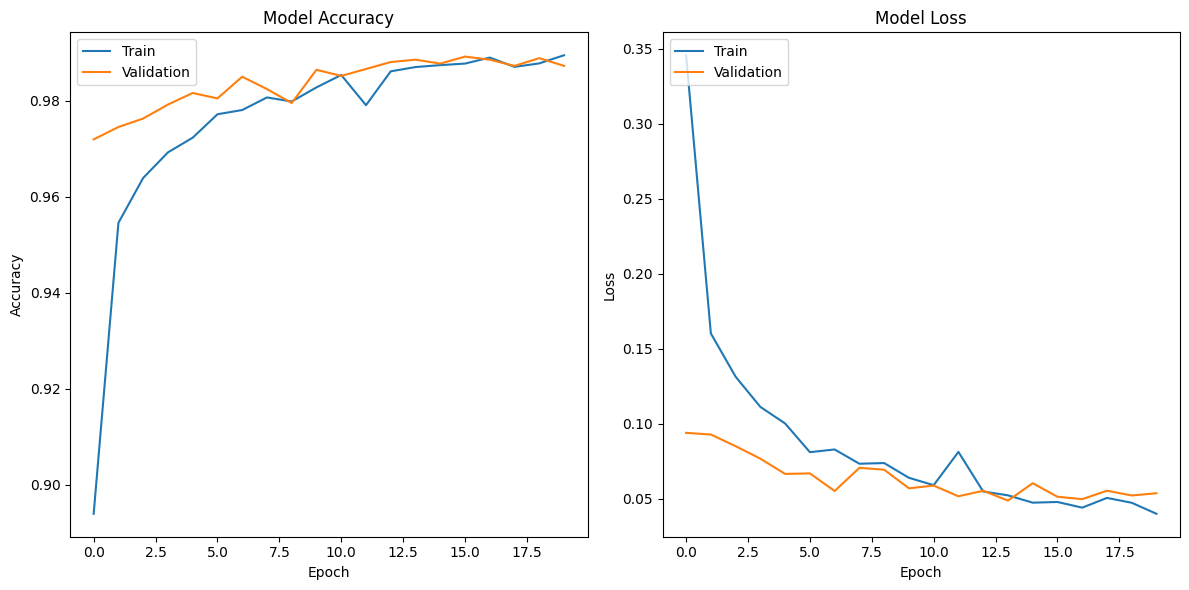

In [ ]:
history = cnn_gru.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

plot_training_history(history)

In [ ]:
y_pred = cnn_gru.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)

# Menghitung dan mencetak akurasi
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# Menghitung dan mencetak confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:')
print(conf_matrix)

# Menghitung dan mencetak classification report
class_report = classification_report(y_test, y_pred_classes)
print('Classification Report:')
print(class_report)

194/194 [==============================] - 4s 16ms/step
Accuracy: 0.9873
Confusion Matrix:
[[ 450    0   27    5    0]
 [   2 1553    1    1    5]
 [  12    1 1872    1    3]
 [   2    0    1 1262    0]
 [   2    4    9    3  986]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       482
           1       1.00      0.99      1.00      1562
           2       0.98      0.99      0.99      1889
           3       0.99      1.00      0.99      1265
           4       0.99      0.98      0.99      1004

    accuracy                           0.99      6202
   macro avg       0.98      0.98      0.98      6202
weighted avg       0.99      0.99      0.99      6202



In [ ]:
# Menghitung dan mencetak precision
precision = precision_score(y_test, y_pred_classes, average='weighted')
print(f'Precision: {precision:.4f}')

# Menghitung dan mencetak sensitivity (recall)
sensitivity = recall_score(y_test, y_pred_classes, average='weighted')
print(f'Sensitivity (Recall): {sensitivity:.4f}')

# Menghitung dan mencetak F1 Score
f1 = f1_score(y_test, y_pred_classes, average='weighted')
print(f'F1 Score: {f1:.4f}')

Precision: 0.9872
Sensitivity (Recall): 0.9873
F1 Score: 0.9872


#3 CRNN

In [ ]:
def create_cnn_rnn_model(input_shape, num_classes):
    model = Sequential()

    # Convolutional layers for feature extraction
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    # Add a Dense layer before SimpleRNN for additional complexity
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())

    # Reshape the output to 2D
    model.add(Reshape((-1, model.output_shape[-1])))

    # SimpleRNN layers for sequence modeling
    model.add(SimpleRNN(128, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(SimpleRNN(128, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(SimpleRNN(128))
    model.add(Dropout(0.5))

    # Flatten the output after the last SimpleRNN layer
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model with adjusted learning rate
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
cnn_rnn = create_cnn_rnn_model(input_shape, num_classes)
cnn_rnn.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_40 (Conv1D)          (None, 254, 128)          512       
                                                                 
 max_pooling1d_40 (MaxPooli  (None, 127, 128)          0         
 ng1D)                                                           
                                                                 
 conv1d_41 (Conv1D)          (None, 125, 256)          98560     
                                                                 
 max_pooling1d_41 (MaxPooli  (None, 62, 256)           0         
 ng1D)                                                           
                                                                 
 flatten_12 (Flatten)        (None, 15872)             0         
                                                                 
 dense_48 (Dense)            (None, 512)             

Epoch 1/20
776/776 [==============================] - 89s 108ms/step - loss: 0.4327 - accuracy: 0.8658 - val_loss: 0.1553 - val_accuracy: 0.9544
Epoch 2/20
776/776 [==============================] - 85s 110ms/step - loss: 0.2122 - accuracy: 0.9396 - val_loss: 0.1319 - val_accuracy: 0.9657
Epoch 3/20
776/776 [==============================] - 77s 100ms/step - loss: 0.1681 - accuracy: 0.9506 - val_loss: 0.1112 - val_accuracy: 0.9737
Epoch 4/20
776/776 [==============================] - 83s 107ms/step - loss: 0.1385 - accuracy: 0.9617 - val_loss: 0.0790 - val_accuracy: 0.9776
Epoch 5/20
776/776 [==============================] - 79s 101ms/step - loss: 0.1132 - accuracy: 0.9678 - val_loss: 0.0830 - val_accuracy: 0.9777
Epoch 6/20
776/776 [==============================] - 90s 116ms/step - loss: 0.1004 - accuracy: 0.9715 - val_loss: 0.0778 - val_accuracy: 0.9805
Epoch 7/20
776/776 [==============================] - 78s 101ms/step - loss: 0.1057 - accuracy: 0.9721 - val_loss: 0.0866 - val_ac

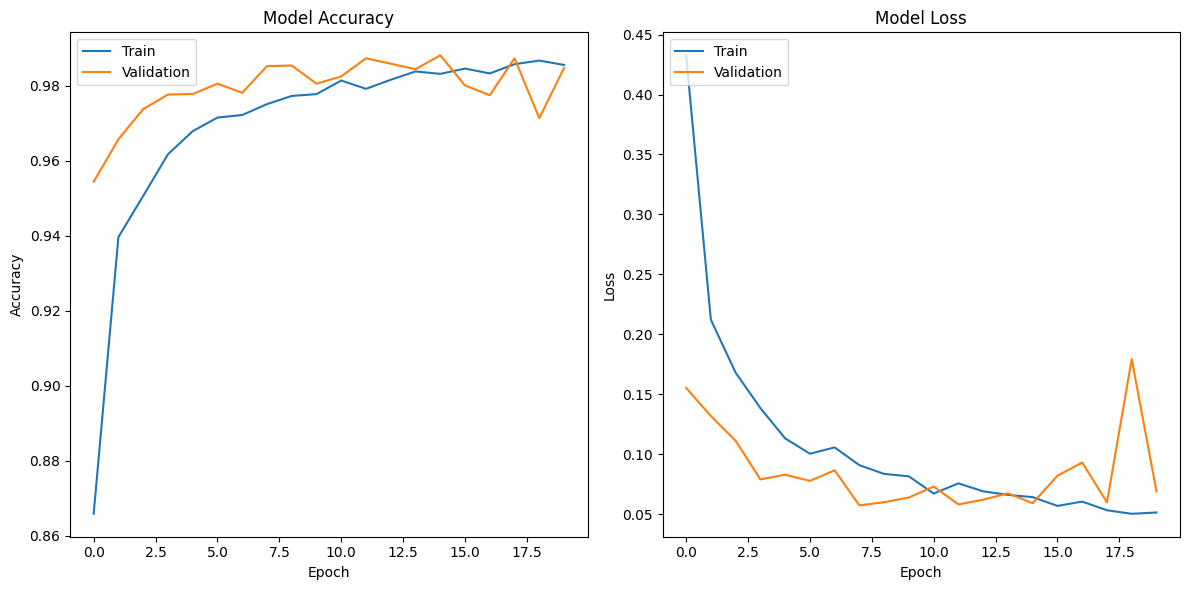

In [ ]:
history = cnn_rnn.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

plot_training_history(history)

In [ ]:
y_pred = cnn_rnn.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)

# Menghitung dan mencetak akurasi
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# Menghitung dan mencetak confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:')
print(conf_matrix)

# Menghitung dan mencetak classification report
class_report = classification_report(y_test, y_pred_classes)
print('Classification Report:')
print(class_report)

194/194 [==============================] - 3s 14ms/step
Accuracy: 0.9847
Confusion Matrix:
[[ 432    0   47    3    0]
 [   1 1550    3    0    8]
 [   4    2 1877    0    6]
 [   3    0    4 1258    0]
 [   3    4    7    0  990]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.93       482
           1       1.00      0.99      0.99      1562
           2       0.97      0.99      0.98      1889
           3       1.00      0.99      1.00      1265
           4       0.99      0.99      0.99      1004

    accuracy                           0.98      6202
   macro avg       0.98      0.97      0.98      6202
weighted avg       0.98      0.98      0.98      6202



In [ ]:
# Menghitung dan mencetak precision
precision = precision_score(y_test, y_pred_classes, average='weighted')
print(f'Precision: {precision:.4f}')

# Menghitung dan mencetak sensitivity (recall)
sensitivity = recall_score(y_test, y_pred_classes, average='weighted')
print(f'Sensitivity (Recall): {sensitivity:.4f}')

# Menghitung dan mencetak F1 Score
f1 = f1_score(y_test, y_pred_classes, average='weighted')
print(f'F1 Score: {f1:.4f}')

Precision: 0.9848
Sensitivity (Recall): 0.9847
F1 Score: 0.9845


#4 CAttention

In [19]:
def create_cnn_attention_gru_model(input_shape, num_classes):
    model = Sequential()

    # Convolutional layers for feature extraction
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=128 * 2, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    # Reshape the output to 2D
    model.add(Reshape((-1, model.output_shape[-1])))

    # Split the output into query and value
    query_value = Dense(32, activation='relu')(model.output)

    # Attention layer (manual implementation)
    query = Dense(32, activation='relu')(query_value)
    value = Dense(32, activation='relu')(query_value)
    attention_scores = Attention()([query, value])

    # Weighted sum of value using attention scores
    attended_value = Dot(axes=(1, 1))([attention_scores, value])

    # GRU layers for sequence modeling
    gru_output = GRU(128, return_sequences=True)(attended_value)
    gru_output = GRU(128, return_sequences=True)(gru_output)
    gru_output = GRU(128)(gru_output)

    # Output layer
    output = Dense(num_classes, activation='softmax')(gru_output)

    # Create the model
    model = Model(inputs=model.input, outputs=output)

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [19]:
# # Create a function to build the Keras model
# def create_cnn_attention_gru_model(input_shape, num_classes):
#     model = Sequential()
#     model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
#     model.add(MaxPooling1D(pool_size=2))
#     model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
#     model.add(MaxPooling1D(pool_size=2))
#     model.add(Reshape((-1, model.output_shape[-1])))
#     query_value = Dense(32, activation='relu')(model.output)
#     query = Dense(32, activation='relu')(query_value)
#     value = Dense(32, activation='relu')(query_value)
#     attention_scores = Attention()([query, value])
#     attended_value = Dot(axes=(1, 1))([attention_scores, value])
#     gru_output = GRU(64, return_sequences=True)(attended_value)
#     gru_output = GRU(64, return_sequences=True)(gru_output)
#     gru_output = GRU(64)(gru_output)
#     output = Dense(num_classes, activation='softmax')(gru_output)
#     model = Model(inputs=model.input, outputs=output)
#     model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model

In [20]:
# Wrap Keras model so it can be used by scikit-learn GridSearchCV
model = KerasClassifier(build_fn=create_cnn_attention_gru_model, filters=32, gru_unit=32, verbose=0, input_shape=input_shape, num_classes=num_classes)

# Define the parameter grid to search through
param_grid = {
    'filters': [32, 64, 128],
    'gru_unit': [32, 64, 128],
    'batch_size': [64],
    'epochs': [100]
}

# Create GridSearchCV instance
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Perform grid search
grid_result = grid.fit(X_train, y_train, callbacks=[EarlyStopping(patience=3)])

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` i

Best: 0.927636 using {'batch_size': 64, 'epochs': 100, 'filters': 128, 'gru_unit': 128}
0.907439 (0.003790) with: {'batch_size': 64, 'epochs': 100, 'filters': 32, 'gru_unit': 32}
0.927402 (0.004300) with: {'batch_size': 64, 'epochs': 100, 'filters': 32, 'gru_unit': 64}
0.926778 (0.005954) with: {'batch_size': 64, 'epochs': 100, 'filters': 32, 'gru_unit': 128}
0.919917 (0.009334) with: {'batch_size': 64, 'epochs': 100, 'filters': 64, 'gru_unit': 32}
0.926934 (0.007494) with: {'batch_size': 64, 'epochs': 100, 'filters': 64, 'gru_unit': 64}
0.921396 (0.016138) with: {'batch_size': 64, 'epochs': 100, 'filters': 64, 'gru_unit': 128}
0.924593 (0.013027) with: {'batch_size': 64, 'epochs': 100, 'filters': 128, 'gru_unit': 32}
0.919058 (0.003576) with: {'batch_size': 64, 'epochs': 100, 'filters': 128, 'gru_unit': 64}
0.927636 (0.003422) with: {'batch_size': 64, 'epochs': 100, 'filters': 128, 'gru_unit': 128}


In [21]:
# cnn_attention = create_cnn_attention_gru_model(input_shape, num_classes)
# cnn_attention.summary()# 

Epoch 1/50
401/401 [==============================] - 19s 34ms/step - loss: 1.3253 - accuracy: 0.5409 - val_loss: 0.8699 - val_accuracy: 0.7299
Epoch 2/50
401/401 [==============================] - 16s 41ms/step - loss: 0.6997 - accuracy: 0.7742 - val_loss: 0.5612 - val_accuracy: 0.8288
Epoch 3/50
401/401 [==============================] - 17s 42ms/step - loss: 0.5586 - accuracy: 0.8178 - val_loss: 0.6198 - val_accuracy: 0.7954
Epoch 4/50
401/401 [==============================] - 16s 41ms/step - loss: 0.4916 - accuracy: 0.8407 - val_loss: 0.4017 - val_accuracy: 0.8656
Epoch 5/50
401/401 [==============================] - 16s 41ms/step - loss: 0.4258 - accuracy: 0.8610 - val_loss: 0.3954 - val_accuracy: 0.8674
Epoch 6/50
401/401 [==============================] - 16s 39ms/step - loss: 0.3983 - accuracy: 0.8697 - val_loss: 0.3957 - val_accuracy: 0.8771
Epoch 7/50
401/401 [==============================] - 15s 38ms/step - loss: 0.3705 - accuracy: 0.8787 - val_loss: 0.3412 - val_accuracy:

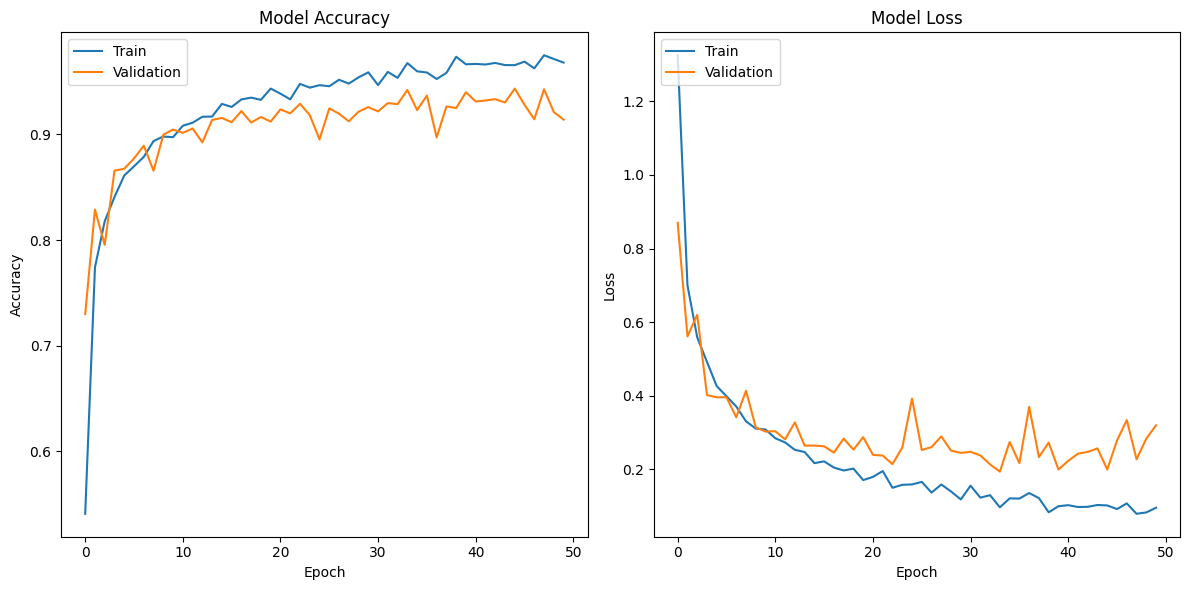

In [33]:
history = cnn_attention.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

plot_training_history(history)

In [35]:
y_pred = cnn_attention.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)

# Menghitung dan mencetak akurasi
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# Menghitung dan mencetak confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:')
print(conf_matrix)

# Menghitung dan mencetak classification report
class_report = classification_report(y_test, y_pred_classes)
print('Classification Report:')
print(class_report)

101/101 [==============================] - 2s 10ms/step
Accuracy: 0.9139
Confusion Matrix:
[[320   0   0   0   0   0   0   0   0   0]
 [ 19 269   3   2   8   2  11   2   0   1]
 [  0   0 305   0   2   0   7   0   0   0]
 [ 15   0   0 310   1   0   2   0   0   0]
 [ 19   9   3  12 211  18  25   0   0   5]
 [ 14   1   0   0   8 295   5   0   3   0]
 [  7  11   6   7  20  10 255   2   1   5]
 [  0   0   0   0   0   0   0 316   0   0]
 [  0   0   0   0   0   0   0   0 327   0]
 [  0   0   2   5   2   0   1   0   0 322]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       320
           1       0.93      0.85      0.89       317
           2       0.96      0.97      0.96       314
           3       0.92      0.95      0.93       328
           4       0.84      0.70      0.76       302
           5       0.91      0.90      0.91       326
           6       0.83      0.79      0.81       324
           7       0.9

In [36]:
# Menghitung dan mencetak precision
precision = precision_score(y_test, y_pred_classes, average='weighted')
print(f'Precision: {precision:.4f}')

# Menghitung dan mencetak sensitivity (recall)
sensitivity = recall_score(y_test, y_pred_classes, average='weighted')
print(f'Sensitivity (Recall): {sensitivity:.4f}')

# Menghitung dan mencetak F1 Score
f1 = f1_score(y_test, y_pred_classes, average='weighted')
print(f'F1 Score: {f1:.4f}')

Precision: 0.9144
Sensitivity (Recall): 0.9139
F1 Score: 0.9123


In [20]:
# Fungsi untuk melakukan K-fold cross-validation
def k_fold_cross_validation(X, y, k=5, epochs=100, batch_size=64):
    # Inisialisasi KFold
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    
    # Daftar untuk menyimpan model pada setiap fold
    models = []
    
    # Loop melalui setiap fold
    for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
        print(f'Fold {fold}')
        
        # Split data menjadi data latih dan data validasi
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        # Inisialisasi model
        model = create_cnn_attention_gru_model(input_shape=input_shape, num_classes=num_classes)
        
        # Latih model
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=2)
        
        plot_training_history(history)
        
        # Evaluasi model pada data validasi
        _, accuracy = model.evaluate(X_val, y_val, verbose=0)
        print(f'Validation Accuracy: {accuracy}')
        
        # Tambahkan model ke dalam daftar
        models.append(model)
        
        print()
    
    return models


Fold 1
Epoch 1/100
201/201 - 28s - loss: 1.5902 - accuracy: 0.4209 - val_loss: 1.2690 - val_accuracy: 0.5384 - 28s/epoch - 138ms/step
Epoch 2/100
201/201 - 23s - loss: 0.9234 - accuracy: 0.6813 - val_loss: 0.8853 - val_accuracy: 0.6896 - 23s/epoch - 113ms/step
Epoch 3/100
201/201 - 24s - loss: 0.7184 - accuracy: 0.7610 - val_loss: 0.6323 - val_accuracy: 0.7860 - 24s/epoch - 117ms/step
Epoch 4/100
201/201 - 23s - loss: 0.5803 - accuracy: 0.8111 - val_loss: 0.5188 - val_accuracy: 0.8235 - 23s/epoch - 116ms/step
Epoch 5/100
201/201 - 23s - loss: 0.4787 - accuracy: 0.8418 - val_loss: 0.4590 - val_accuracy: 0.8493 - 23s/epoch - 115ms/step
Epoch 6/100
201/201 - 23s - loss: 0.4515 - accuracy: 0.8502 - val_loss: 0.4305 - val_accuracy: 0.8525 - 23s/epoch - 116ms/step
Epoch 7/100
201/201 - 23s - loss: 0.4039 - accuracy: 0.8707 - val_loss: 0.3801 - val_accuracy: 0.8768 - 23s/epoch - 114ms/step
Epoch 8/100
201/201 - 23s - loss: 0.3368 - accuracy: 0.8877 - val_loss: 0.3774 - val_accuracy: 0.8768 - 

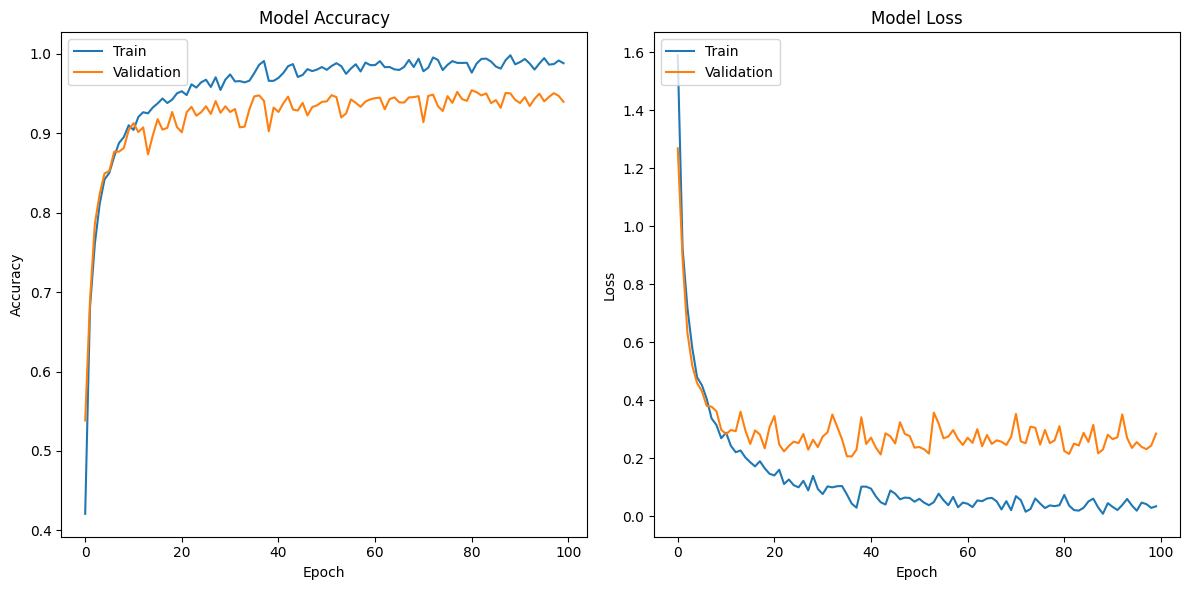

Validation Accuracy: 0.9394884705543518

Fold 2
Epoch 1/100
201/201 - 32s - loss: 1.5051 - accuracy: 0.4662 - val_loss: 1.0541 - val_accuracy: 0.6547 - 32s/epoch - 160ms/step
Epoch 2/100
201/201 - 25s - loss: 0.8983 - accuracy: 0.6962 - val_loss: 0.7631 - val_accuracy: 0.7586 - 25s/epoch - 126ms/step
Epoch 3/100
201/201 - 25s - loss: 0.7175 - accuracy: 0.7621 - val_loss: 0.6251 - val_accuracy: 0.7994 - 25s/epoch - 126ms/step
Epoch 4/100
201/201 - 24s - loss: 0.5651 - accuracy: 0.8094 - val_loss: 0.5342 - val_accuracy: 0.8288 - 24s/epoch - 119ms/step
Epoch 5/100
201/201 - 24s - loss: 0.5048 - accuracy: 0.8338 - val_loss: 0.4460 - val_accuracy: 0.8575 - 24s/epoch - 118ms/step
Epoch 6/100
201/201 - 24s - loss: 0.4390 - accuracy: 0.8543 - val_loss: 0.5002 - val_accuracy: 0.8350 - 24s/epoch - 119ms/step
Epoch 7/100
201/201 - 24s - loss: 0.3900 - accuracy: 0.8663 - val_loss: 0.4179 - val_accuracy: 0.8715 - 24s/epoch - 117ms/step
Epoch 8/100
201/201 - 24s - loss: 0.3509 - accuracy: 0.8801 - v

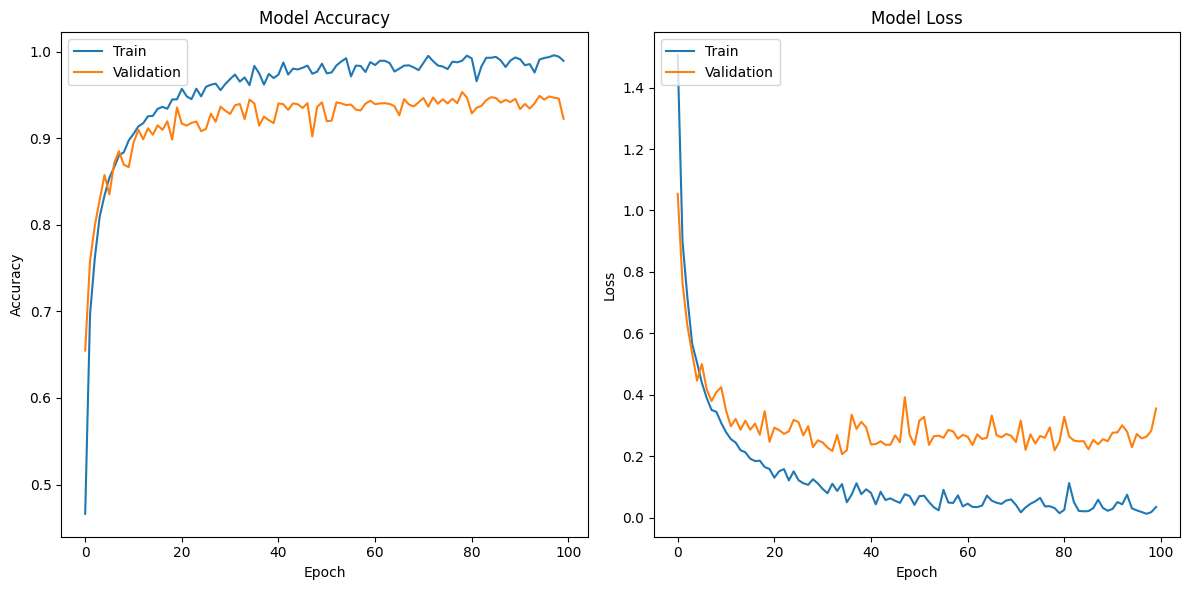

Validation Accuracy: 0.9223331212997437

Fold 3
Epoch 1/100
201/201 - 31s - loss: 1.6207 - accuracy: 0.4154 - val_loss: 1.1487 - val_accuracy: 0.5836 - 31s/epoch - 154ms/step
Epoch 2/100
201/201 - 24s - loss: 0.9174 - accuracy: 0.6813 - val_loss: 0.7677 - val_accuracy: 0.7402 - 24s/epoch - 119ms/step
Epoch 3/100
201/201 - 22s - loss: 0.6952 - accuracy: 0.7667 - val_loss: 0.6026 - val_accuracy: 0.7998 - 22s/epoch - 111ms/step
Epoch 4/100
201/201 - 23s - loss: 0.5818 - accuracy: 0.8074 - val_loss: 0.5134 - val_accuracy: 0.8347 - 23s/epoch - 112ms/step
Epoch 5/100
201/201 - 22s - loss: 0.4951 - accuracy: 0.8345 - val_loss: 0.4725 - val_accuracy: 0.8387 - 22s/epoch - 112ms/step
Epoch 6/100
201/201 - 22s - loss: 0.4350 - accuracy: 0.8569 - val_loss: 0.3800 - val_accuracy: 0.8699 - 22s/epoch - 110ms/step
Epoch 7/100
201/201 - 22s - loss: 0.3835 - accuracy: 0.8733 - val_loss: 0.3421 - val_accuracy: 0.8915 - 22s/epoch - 109ms/step
Epoch 8/100
201/201 - 22s - loss: 0.3412 - accuracy: 0.8862 - v

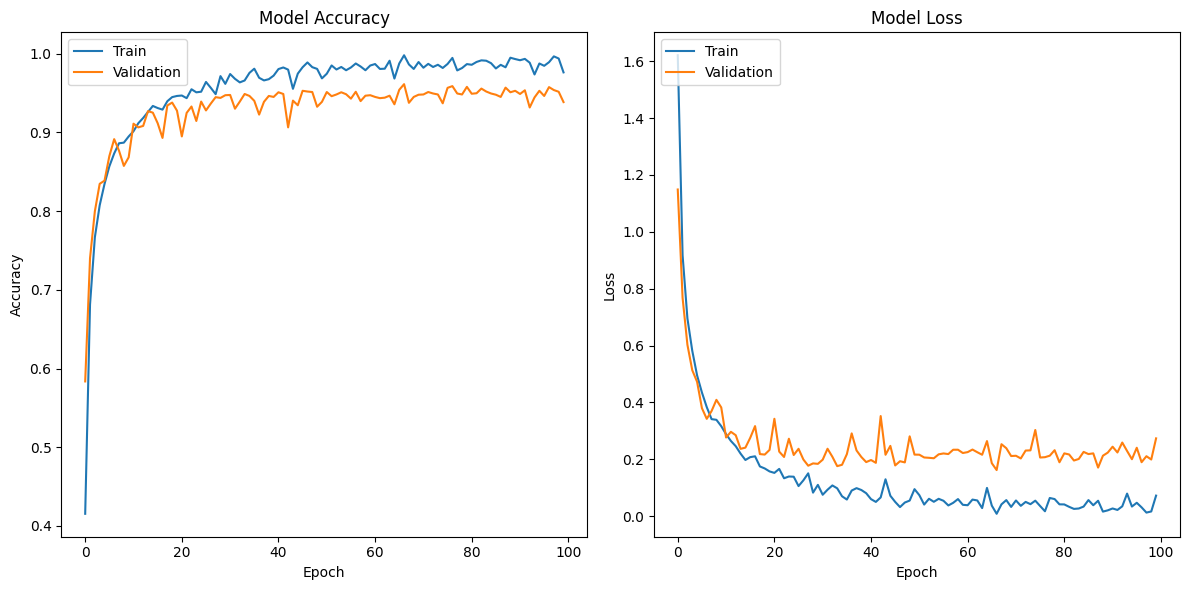

Validation Accuracy: 0.938552737236023

Fold 4
Epoch 1/100
201/201 - 30s - loss: 1.5884 - accuracy: 0.4322 - val_loss: 1.0195 - val_accuracy: 0.6563 - 30s/epoch - 148ms/step
Epoch 2/100
201/201 - 22s - loss: 0.9521 - accuracy: 0.6748 - val_loss: 0.8992 - val_accuracy: 0.7121 - 22s/epoch - 110ms/step
Epoch 3/100
201/201 - 22s - loss: 0.7356 - accuracy: 0.7502 - val_loss: 0.6650 - val_accuracy: 0.7817 - 22s/epoch - 111ms/step
Epoch 4/100
201/201 - 24s - loss: 0.6351 - accuracy: 0.7861 - val_loss: 0.5870 - val_accuracy: 0.8166 - 24s/epoch - 118ms/step
Epoch 5/100
201/201 - 22s - loss: 0.5146 - accuracy: 0.8337 - val_loss: 0.5769 - val_accuracy: 0.8147 - 22s/epoch - 110ms/step
Epoch 6/100
201/201 - 22s - loss: 0.4740 - accuracy: 0.8414 - val_loss: 0.4693 - val_accuracy: 0.8462 - 22s/epoch - 110ms/step
Epoch 7/100
201/201 - 23s - loss: 0.3984 - accuracy: 0.8656 - val_loss: 0.4654 - val_accuracy: 0.8487 - 23s/epoch - 113ms/step
Epoch 8/100
201/201 - 23s - loss: 0.3688 - accuracy: 0.8770 - va

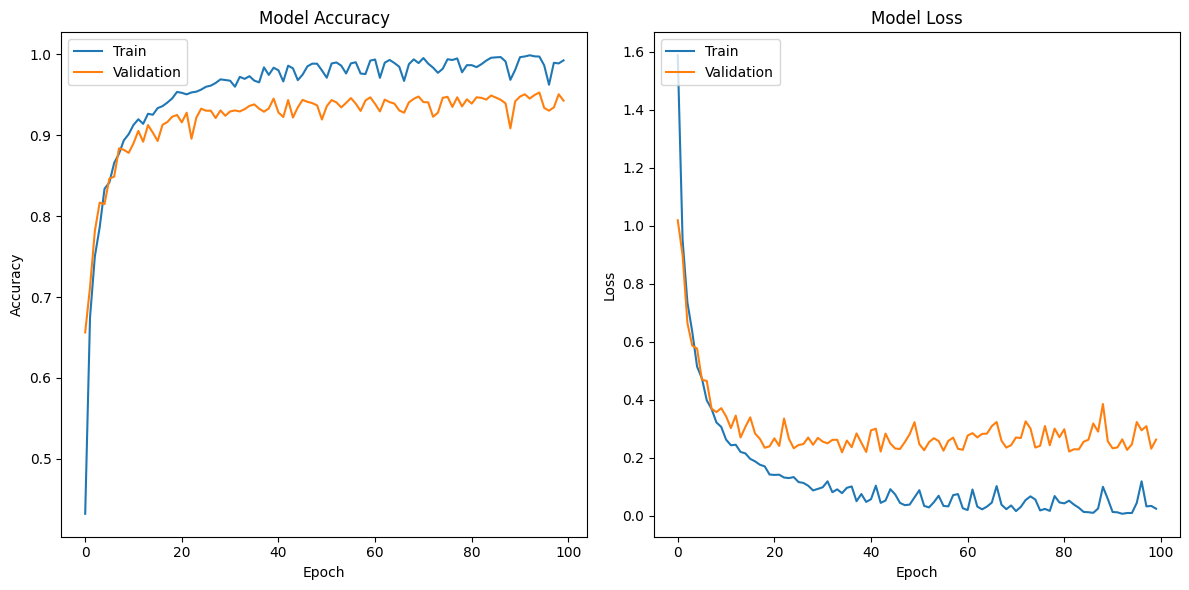

Validation Accuracy: 0.942607581615448

Fold 5
Epoch 1/100
201/201 - 29s - loss: 1.7194 - accuracy: 0.3769 - val_loss: 1.3129 - val_accuracy: 0.5430 - 29s/epoch - 145ms/step
Epoch 2/100
201/201 - 23s - loss: 1.0320 - accuracy: 0.6418 - val_loss: 0.9145 - val_accuracy: 0.6756 - 23s/epoch - 113ms/step
Epoch 3/100
201/201 - 23s - loss: 0.8037 - accuracy: 0.7284 - val_loss: 0.7717 - val_accuracy: 0.7402 - 23s/epoch - 114ms/step
Epoch 4/100
201/201 - 23s - loss: 0.6633 - accuracy: 0.7800 - val_loss: 0.7522 - val_accuracy: 0.7467 - 23s/epoch - 113ms/step
Epoch 5/100
201/201 - 23s - loss: 0.5491 - accuracy: 0.8185 - val_loss: 0.6535 - val_accuracy: 0.7854 - 23s/epoch - 113ms/step
Epoch 6/100
201/201 - 23s - loss: 0.5079 - accuracy: 0.8280 - val_loss: 0.4845 - val_accuracy: 0.8403 - 23s/epoch - 115ms/step
Epoch 7/100
201/201 - 23s - loss: 0.4628 - accuracy: 0.8486 - val_loss: 0.6216 - val_accuracy: 0.7938 - 23s/epoch - 113ms/step
Epoch 8/100
201/201 - 23s - loss: 0.3985 - accuracy: 0.8717 - va

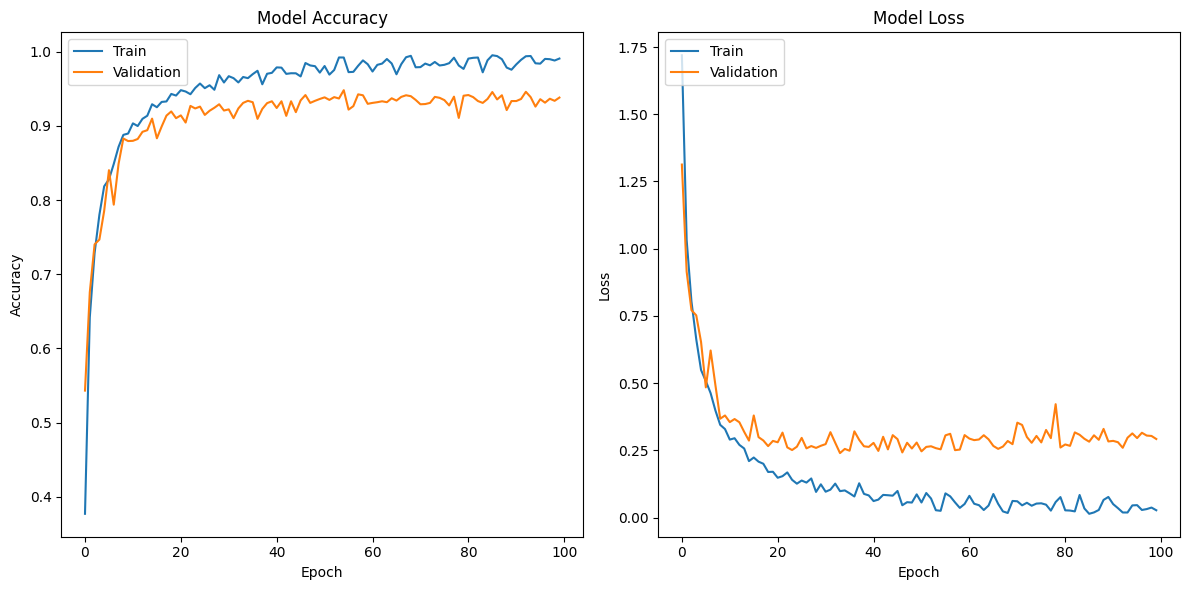

Validation Accuracy: 0.9382408261299133



In [21]:
cnn_attention_gru = k_fold_cross_validation(X_resampling, y_resampling)

In [33]:
y_pred = cnn_attention_gru[3].predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)

# Menghitung dan mencetak akurasi
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# Menghitung dan mencetak confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:')
print(conf_matrix)

# Menghitung dan mencetak classification report
class_report = classification_report(y_test, y_pred_classes)
print('Classification Report:')
print(class_report)

101/101 [==============================] - 2s 15ms/step
Accuracy: 0.9857
Confusion Matrix:
[[319   0   0   1   0   0   0   0   0   0]
 [  0 305   4   0   4   0   2   1   1   0]
 [  0   0 314   0   0   0   0   0   0   0]
 [  0   0   0 326   1   0   0   0   0   1]
 [  0   4   0   0 290   3   5   0   0   0]
 [  0   0   0   0   1 323   2   0   0   0]
 [  1   3   1   0   6   2 309   0   0   2]
 [  0   0   0   0   0   0   0 316   0   0]
 [  0   0   0   0   0   0   0   0 327   0]
 [  0   0   0   1   0   0   0   0   0 331]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       320
           1       0.98      0.96      0.97       317
           2       0.98      1.00      0.99       314
           3       0.99      0.99      0.99       328
           4       0.96      0.96      0.96       302
           5       0.98      0.99      0.99       326
           6       0.97      0.95      0.96       324
           7       1.0

In [34]:
# Menghitung dan mencetak precision
precision = precision_score(y_test, y_pred_classes, average='weighted')
print(f'Precision: {precision:.4f}')

# Menghitung dan mencetak sensitivity (recall)
sensitivity = recall_score(y_test, y_pred_classes, average='weighted')
print(f'Sensitivity (Recall): {sensitivity:.4f}')

# Menghitung dan mencetak F1 Score
f1 = f1_score(y_test, y_pred_classes, average='weighted')
print(f'F1 Score: {f1:.4f}')

Precision: 0.9856
Sensitivity (Recall): 0.9857
F1 Score: 0.9856


In [36]:
with open("C:\\Users\\Administrator\\Documents\\my TA model\\cnn_attention_gru_list.pkl", "wb") as f:
    pickle.dump(cnn_attention_gru, f)

INFO:tensorflow:Assets written to: C:\Users\ADMINI~1\AppData\Local\Temp\tmp_t26ybrl\assets


INFO:tensorflow:Assets written to: C:\Users\ADMINI~1\AppData\Local\Temp\tmp_t26ybrl\assets


INFO:tensorflow:Assets written to: C:\Users\ADMINI~1\AppData\Local\Temp\tmpee7h3qny\assets


INFO:tensorflow:Assets written to: C:\Users\ADMINI~1\AppData\Local\Temp\tmpee7h3qny\assets


INFO:tensorflow:Assets written to: C:\Users\ADMINI~1\AppData\Local\Temp\tmpg7z1utdw\assets


INFO:tensorflow:Assets written to: C:\Users\ADMINI~1\AppData\Local\Temp\tmpg7z1utdw\assets


INFO:tensorflow:Assets written to: C:\Users\ADMINI~1\AppData\Local\Temp\tmp5ip5e0_o\assets


INFO:tensorflow:Assets written to: C:\Users\ADMINI~1\AppData\Local\Temp\tmp5ip5e0_o\assets


INFO:tensorflow:Assets written to: C:\Users\ADMINI~1\AppData\Local\Temp\tmp8zeur6te\assets


INFO:tensorflow:Assets written to: C:\Users\ADMINI~1\AppData\Local\Temp\tmp8zeur6te\assets


In [36]:
# cnn_attention_gru[1].save('C:\\Users\\Administrator\\Documents\\my TA model\\cnn_attention_gru_feature.h5')

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
def create_cnn_attention_gru_model_non_tuning(input_shape, num_classes):
    model = Sequential()

    # Convolutional layers for feature extraction
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64 * 2, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    # Reshape the output to 2D
    model.add(Reshape((-1, model.output_shape[-1])))

    # Split the output into query and value
    query_value = Dense(32, activation='relu')(model.output)

    # Attention layer (manual implementation)
    query = Dense(32, activation='relu')(query_value)
    value = Dense(32, activation='relu')(query_value)
    attention_scores = Attention()([query, value])

    # Weighted sum of value using attention scores
    attended_value = Dot(axes=(1, 1))([attention_scores, value])

    # GRU layers for sequence modeling
    gru_output = GRU(64, return_sequences=True)(attended_value)
    gru_output = GRU(64, return_sequences=True)(gru_output)
    gru_output = GRU(64)(gru_output)

    # Output layer
    output = Dense(num_classes, activation='softmax')(gru_output)

    # Create the model
    model = Model(inputs=model.input, outputs=output)

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [19]:
# Fungsi untuk melakukan K-fold cross-validation
def k_fold_cross_validation_non_tuning(X, y, k=5, epochs=50, batch_size=32):
    # Inisialisasi KFold
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    
    # Daftar untuk menyimpan model pada setiap fold
    models = []
    
    # Loop melalui setiap fold
    for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
        print(f'Fold {fold}')
        
        # Split data menjadi data latih dan data validasi
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        # Inisialisasi model
        model = create_cnn_attention_gru_model_non_tuning(input_shape=input_shape, num_classes=num_classes)
        
        # Latih model
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=2)
        
        plot_training_history(history)
        
        # Evaluasi model pada data validasi
        _, accuracy = model.evaluate(X_val, y_val, verbose=0)
        print(f'Validation Accuracy: {accuracy}')
        
        # Tambahkan model ke dalam daftar
        models.append(model)
        
        print()
    
    return models


Fold 1
Epoch 1/50
401/401 - 20s - loss: 1.5929 - accuracy: 0.4234 - val_loss: 1.1701 - val_accuracy: 0.6004 - 20s/epoch - 49ms/step
Epoch 2/50
401/401 - 15s - loss: 0.9258 - accuracy: 0.6838 - val_loss: 1.1802 - val_accuracy: 0.6369 - 15s/epoch - 36ms/step
Epoch 3/50
401/401 - 15s - loss: 0.7284 - accuracy: 0.7564 - val_loss: 0.7236 - val_accuracy: 0.7676 - 15s/epoch - 36ms/step
Epoch 4/50
401/401 - 15s - loss: 0.6351 - accuracy: 0.7898 - val_loss: 0.5782 - val_accuracy: 0.8016 - 15s/epoch - 37ms/step
Epoch 5/50
401/401 - 14s - loss: 0.5366 - accuracy: 0.8186 - val_loss: 0.5186 - val_accuracy: 0.8288 - 14s/epoch - 36ms/step
Epoch 6/50
401/401 - 14s - loss: 0.4807 - accuracy: 0.8391 - val_loss: 0.4748 - val_accuracy: 0.8415 - 14s/epoch - 36ms/step
Epoch 7/50
401/401 - 14s - loss: 0.4310 - accuracy: 0.8551 - val_loss: 0.4638 - val_accuracy: 0.8419 - 14s/epoch - 36ms/step
Epoch 8/50
401/401 - 15s - loss: 0.4031 - accuracy: 0.8664 - val_loss: 0.4191 - val_accuracy: 0.8618 - 15s/epoch - 37m

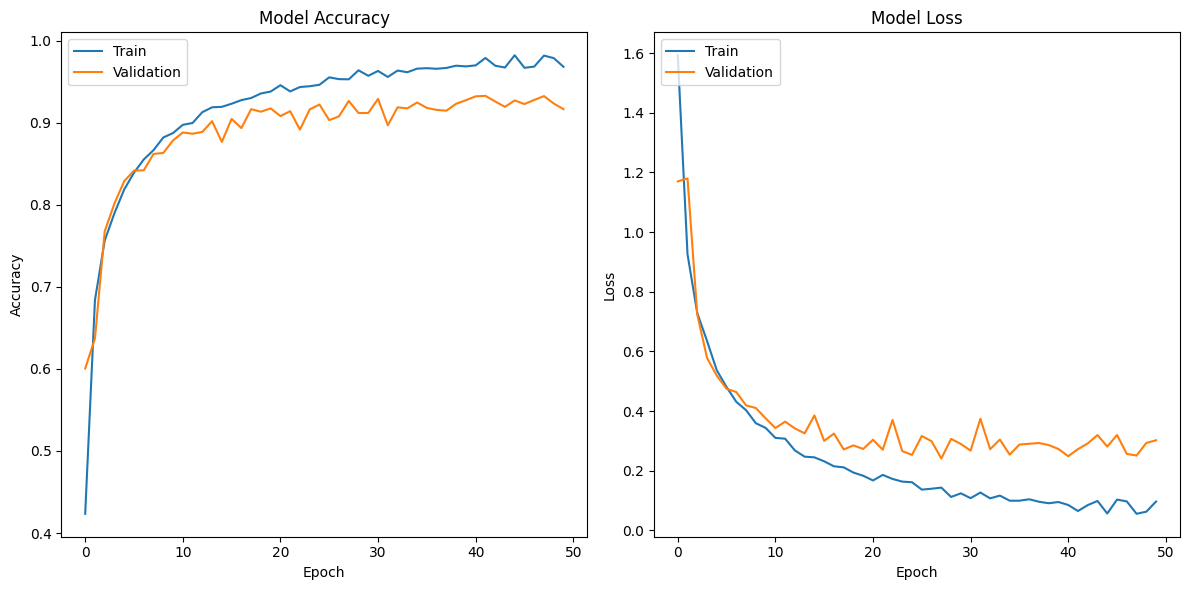

Validation Accuracy: 0.9164067506790161

Fold 2
Epoch 1/50
401/401 - 21s - loss: 1.5303 - accuracy: 0.4511 - val_loss: 1.0606 - val_accuracy: 0.6347 - 21s/epoch - 53ms/step
Epoch 2/50
401/401 - 15s - loss: 0.8757 - accuracy: 0.7055 - val_loss: 0.7077 - val_accuracy: 0.7711 - 15s/epoch - 36ms/step
Epoch 3/50
401/401 - 15s - loss: 0.6475 - accuracy: 0.7883 - val_loss: 0.5946 - val_accuracy: 0.8072 - 15s/epoch - 37ms/step
Epoch 4/50
401/401 - 15s - loss: 0.5366 - accuracy: 0.8270 - val_loss: 0.5851 - val_accuracy: 0.8119 - 15s/epoch - 37ms/step
Epoch 5/50
401/401 - 14s - loss: 0.4724 - accuracy: 0.8453 - val_loss: 0.4875 - val_accuracy: 0.8509 - 14s/epoch - 36ms/step
Epoch 6/50
401/401 - 15s - loss: 0.4194 - accuracy: 0.8605 - val_loss: 0.4496 - val_accuracy: 0.8568 - 15s/epoch - 36ms/step
Epoch 7/50
401/401 - 14s - loss: 0.3862 - accuracy: 0.8725 - val_loss: 0.6309 - val_accuracy: 0.7954 - 14s/epoch - 36ms/step
Epoch 8/50
401/401 - 15s - loss: 0.3503 - accuracy: 0.8853 - val_loss: 0.4040

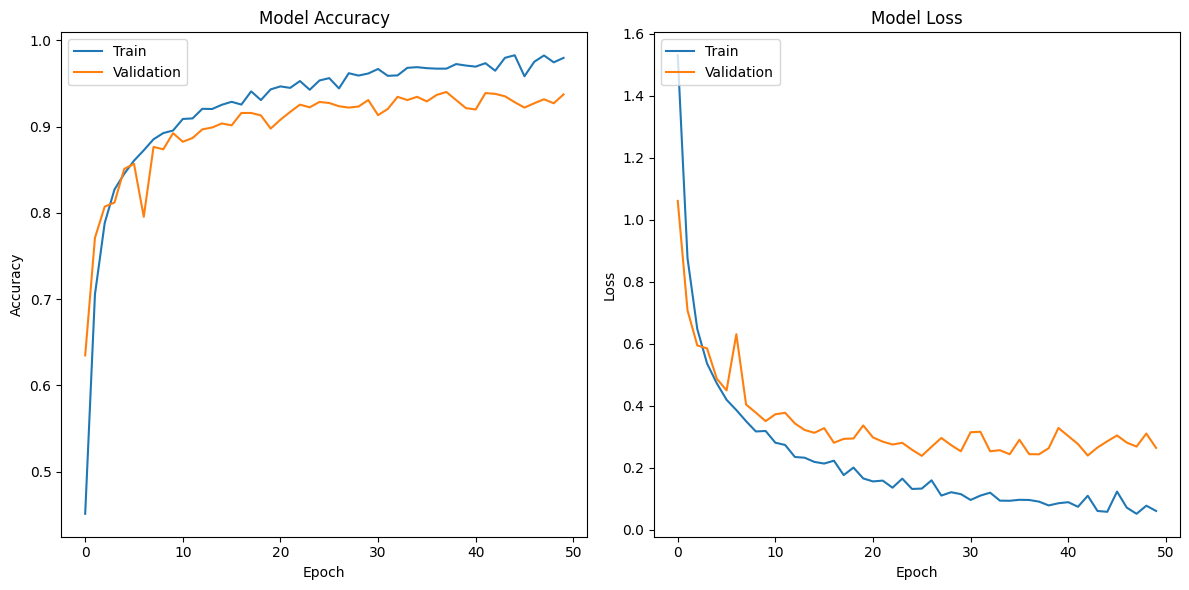

Validation Accuracy: 0.9373050332069397

Fold 3
Epoch 1/50
401/401 - 21s - loss: 1.5276 - accuracy: 0.4480 - val_loss: 0.9846 - val_accuracy: 0.6728 - 21s/epoch - 53ms/step
Epoch 2/50
401/401 - 15s - loss: 0.8551 - accuracy: 0.7166 - val_loss: 0.6601 - val_accuracy: 0.7854 - 15s/epoch - 37ms/step
Epoch 3/50
401/401 - 14s - loss: 0.6391 - accuracy: 0.7882 - val_loss: 0.5286 - val_accuracy: 0.8241 - 14s/epoch - 35ms/step
Epoch 4/50
401/401 - 14s - loss: 0.5607 - accuracy: 0.8155 - val_loss: 0.5283 - val_accuracy: 0.8206 - 14s/epoch - 36ms/step
Epoch 5/50
401/401 - 15s - loss: 0.4674 - accuracy: 0.8447 - val_loss: 0.4446 - val_accuracy: 0.8484 - 15s/epoch - 36ms/step
Epoch 6/50
401/401 - 14s - loss: 0.4240 - accuracy: 0.8611 - val_loss: 0.4142 - val_accuracy: 0.8562 - 14s/epoch - 36ms/step
Epoch 7/50
401/401 - 14s - loss: 0.3738 - accuracy: 0.8749 - val_loss: 0.3830 - val_accuracy: 0.8693 - 14s/epoch - 35ms/step
Epoch 8/50
401/401 - 14s - loss: 0.3431 - accuracy: 0.8858 - val_loss: 0.3420

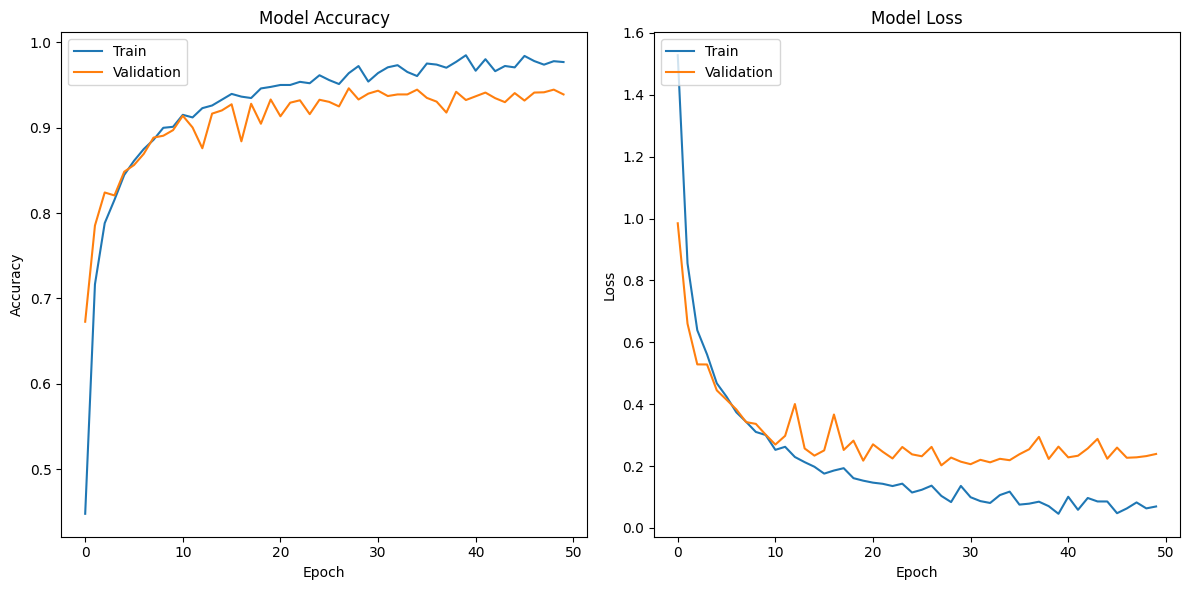

Validation Accuracy: 0.9388646483421326

Fold 4
Epoch 1/50
401/401 - 21s - loss: 1.4094 - accuracy: 0.5030 - val_loss: 1.0283 - val_accuracy: 0.6507 - 21s/epoch - 52ms/step
Epoch 2/50
401/401 - 14s - loss: 0.8514 - accuracy: 0.7155 - val_loss: 0.7923 - val_accuracy: 0.7377 - 14s/epoch - 35ms/step
Epoch 3/50
401/401 - 14s - loss: 0.6953 - accuracy: 0.7735 - val_loss: 0.6976 - val_accuracy: 0.7732 - 14s/epoch - 36ms/step
Epoch 4/50
401/401 - 14s - loss: 0.5775 - accuracy: 0.8147 - val_loss: 0.5747 - val_accuracy: 0.8104 - 14s/epoch - 36ms/step
Epoch 5/50
401/401 - 14s - loss: 0.5109 - accuracy: 0.8329 - val_loss: 0.5187 - val_accuracy: 0.8281 - 14s/epoch - 35ms/step
Epoch 6/50
401/401 - 15s - loss: 0.4663 - accuracy: 0.8454 - val_loss: 0.4931 - val_accuracy: 0.8366 - 15s/epoch - 36ms/step
Epoch 7/50
401/401 - 14s - loss: 0.4166 - accuracy: 0.8628 - val_loss: 0.5706 - val_accuracy: 0.8091 - 14s/epoch - 36ms/step
Epoch 8/50
401/401 - 15s - loss: 0.3683 - accuracy: 0.8760 - val_loss: 0.4628

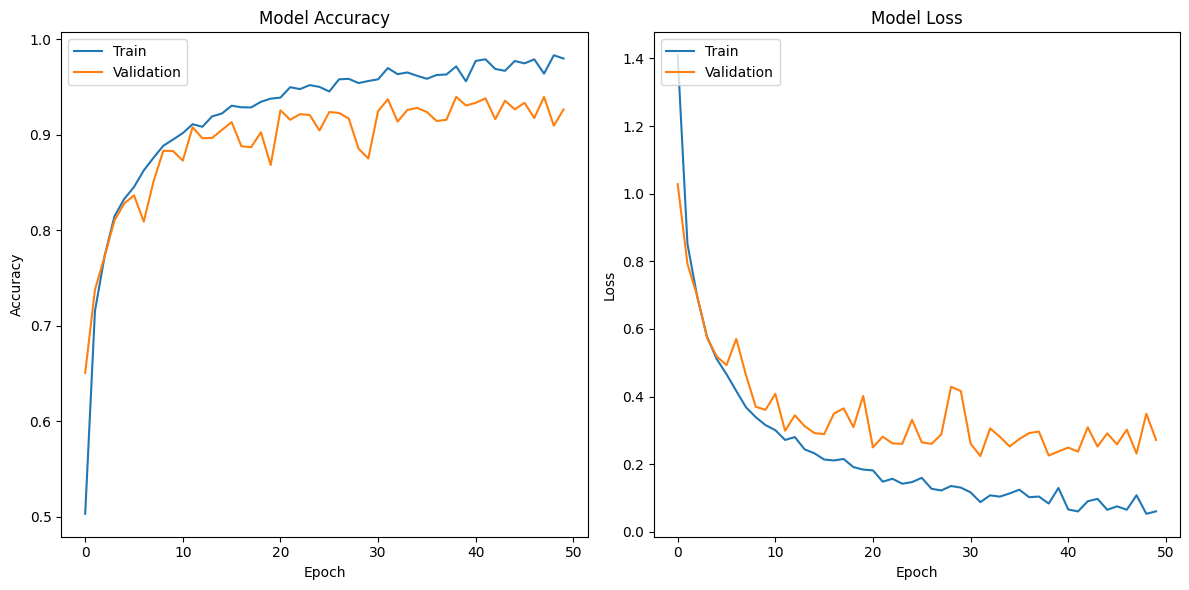

Validation Accuracy: 0.9266999363899231

Fold 5
Epoch 1/50
401/401 - 21s - loss: 1.5349 - accuracy: 0.4493 - val_loss: 1.0762 - val_accuracy: 0.6257 - 21s/epoch - 51ms/step
Epoch 2/50
401/401 - 14s - loss: 0.8711 - accuracy: 0.7091 - val_loss: 0.8261 - val_accuracy: 0.7236 - 14s/epoch - 36ms/step
Epoch 3/50
401/401 - 14s - loss: 0.6836 - accuracy: 0.7757 - val_loss: 0.6475 - val_accuracy: 0.7895 - 14s/epoch - 36ms/step
Epoch 4/50
401/401 - 14s - loss: 0.5786 - accuracy: 0.8110 - val_loss: 0.6066 - val_accuracy: 0.8026 - 14s/epoch - 35ms/step
Epoch 5/50
401/401 - 14s - loss: 0.4731 - accuracy: 0.8480 - val_loss: 0.5012 - val_accuracy: 0.8412 - 14s/epoch - 35ms/step
Epoch 6/50
401/401 - 14s - loss: 0.4282 - accuracy: 0.8587 - val_loss: 0.5597 - val_accuracy: 0.8169 - 14s/epoch - 35ms/step
Epoch 7/50
401/401 - 14s - loss: 0.3991 - accuracy: 0.8692 - val_loss: 0.4190 - val_accuracy: 0.8674 - 14s/epoch - 36ms/step
Epoch 8/50
401/401 - 15s - loss: 0.3494 - accuracy: 0.8877 - val_loss: 0.3754

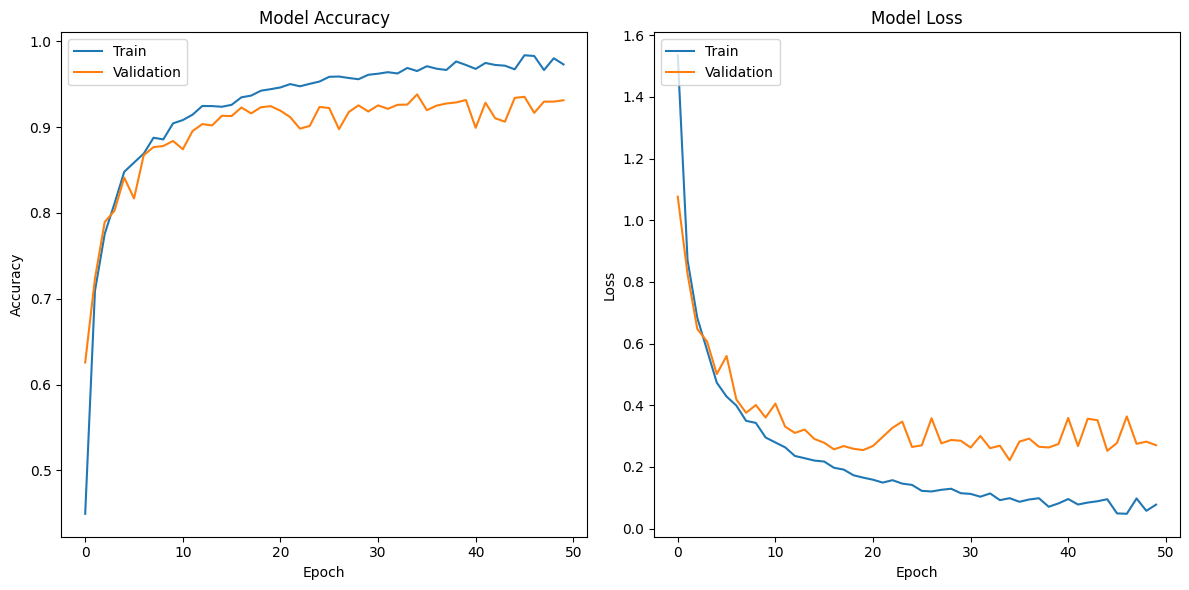

Validation Accuracy: 0.9313786625862122



In [21]:
cnn_attention_gru_non_tuning = k_fold_cross_validation_non_tuning(X_resampling, y_resampling)

In [28]:
y_pred = cnn_attention_gru_non_tuning[4].predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)

# Menghitung dan mencetak akurasi
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# Menghitung dan mencetak confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:')
print(conf_matrix)

# Menghitung dan mencetak classification report
class_report = classification_report(y_test, y_pred_classes)
print('Classification Report:')
print(class_report)

101/101 [==============================] - 2s 8ms/step
Accuracy: 0.9701
Confusion Matrix:
[[320   0   0   0   0   0   0   0   0   0]
 [  0 310   1   0   2   1   3   0   0   0]
 [  0   0 314   0   0   0   0   0   0   0]
 [  2   0   0 315   8   1   1   0   0   1]
 [  6   4   3   0 265  14   7   0   1   2]
 [  0   3   0   0   2 320   1   0   0   0]
 [  1   7   1   0  10   9 292   0   4   0]
 [  0   0   0   0   0   0   0 316   0   0]
 [  0   0   0   0   0   0   0   0 327   0]
 [  0   0   0   0   1   0   0   0   0 331]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       320
           1       0.96      0.98      0.97       317
           2       0.98      1.00      0.99       314
           3       1.00      0.96      0.98       328
           4       0.92      0.88      0.90       302
           5       0.93      0.98      0.95       326
           6       0.96      0.90      0.93       324
           7       1.00

In [29]:
# Menghitung dan mencetak precision
precision = precision_score(y_test, y_pred_classes, average='weighted')
print(f'Precision: {precision:.4f}')

# Menghitung dan mencetak sensitivity (recall)
sensitivity = recall_score(y_test, y_pred_classes, average='weighted')
print(f'Sensitivity (Recall): {sensitivity:.4f}')

# Menghitung dan mencetak F1 Score
f1 = f1_score(y_test, y_pred_classes, average='weighted')
print(f'F1 Score: {f1:.4f}')

Precision: 0.9701
Sensitivity (Recall): 0.9701
F1 Score: 0.9698


In [30]:
with open("C:\\Users\\Administrator\\Documents\\my TA model\\cnn_attention_gru_list_non_tuning.pkl", "wb") as f:
    pickle.dump(cnn_attention_gru_non_tuning, f)

INFO:tensorflow:Assets written to: C:\Users\ADMINI~1\AppData\Local\Temp\tmpw8wczh0b\assets


INFO:tensorflow:Assets written to: C:\Users\ADMINI~1\AppData\Local\Temp\tmpw8wczh0b\assets


INFO:tensorflow:Assets written to: C:\Users\ADMINI~1\AppData\Local\Temp\tmpxf5ea5y2\assets


INFO:tensorflow:Assets written to: C:\Users\ADMINI~1\AppData\Local\Temp\tmpxf5ea5y2\assets


INFO:tensorflow:Assets written to: C:\Users\ADMINI~1\AppData\Local\Temp\tmp3xdu4ico\assets


INFO:tensorflow:Assets written to: C:\Users\ADMINI~1\AppData\Local\Temp\tmp3xdu4ico\assets


INFO:tensorflow:Assets written to: C:\Users\ADMINI~1\AppData\Local\Temp\tmpxk27z979\assets


INFO:tensorflow:Assets written to: C:\Users\ADMINI~1\AppData\Local\Temp\tmpxk27z979\assets


INFO:tensorflow:Assets written to: C:\Users\ADMINI~1\AppData\Local\Temp\tmpyb555sb1\assets


INFO:tensorflow:Assets written to: C:\Users\ADMINI~1\AppData\Local\Temp\tmpyb555sb1\assets


Save Model

In [ ]:
# cnn_lstm.save('C:\\Users\\Administrator\\Documents\\TA\\cnn_lstm.h5')
# cnn_gru.save('C:\\Users\\Administrator\\Documents\\TA\\cnn_gru.h5')
# cnn_rnn.save('C:\\Users\\Administrator\\Documents\\TA\\cnn_rnn.h5')

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
